In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import f1_score, classification_report

from sklearn import svm
from gensim import models
import gensim.models as g

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import auc, roc_curve, roc_auc_score

import gensim.downloader as api
from gensim.models import Word2Vec

In [2]:
df = pd.read_csv("../data/preprocessed_cleaned_body.csv")

In [3]:
df.head()

,Body,Bias,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,1.67,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,0.67,federal appeal court rejected direct constitut...
2,As part of the Trump administration's effort t...,-2.75,part trump administration effort slow migrant ...
3,"President Donald Trump and ""the Trump of the T...",-4.33,president donald trump trump tropic brazilian ...
4,"U.S Senator Elizabeth Warren, who is competing...",-10.00,u senator elizabeth warren competing democrati...


In [4]:
right = df.loc[df['Bias'] >= 5]
neutral = df.loc[(df['Bias'] < 5) & (df['Bias'] > -5)]
left = df.loc[df['Bias'] <= -5]
print (len(right) + len(neutral) + len(left))

1675


In [5]:
right['Bias'] = 1
neutral['Bias'] = 0
left['Bias'] = -1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [6]:
cat_df = pd.concat([right, neutral, left])
cat_df

,Body,Bias,cleaned_body
13,President Donald Trump has vetoed a resolution...,1,president donald trump ha vetoed resolution st...
155,Asked by if he believes President Trump's emer...,1,asked belief president trump emergency declara...
156,You May Like\nThese 10 Shawshank Redemption Fa...,1,may like shawshank redemption fact insane hive...
157,"NEW: This Germantown, Md. man tells he was att...",1,new germantown md man tell wa attacked saturda...
158,“A little as two to three milligrams of fentan...,1,“a little two three milligram fentanyl induce ...
159,California’s State Senate passed a similar bil...,1,california’s state senate passed similar bill ...
160,Trump’s national emergency as a rallying cry f...,1,trump’s national emergency rallying cry republ...
161,"Santos, who resided in Falmouth, Massachusetts...",1,santos resided falmouth massachusetts police s...
162,"Sen. Kamala Harris (D-CA), a candidate for 202...",1,sen kamala harris dca candidate ’s presidentia...
163,Ads by Revcontent\nYou May Like\nSurgeon: Simp...,1,ad revcontent may like surgeon simple method e...


In [7]:
api.info()

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

In [8]:
trained_model = api.load('word2vec-google-news-300')

In [9]:
trained_model = g.KeyedVectors.load_word2vec_format('/Users/monicabellare/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', binary = True) 

In [10]:
trained_model.vector_size

300

In [11]:
#sample_vec = trained_model['money']
sample_vec = trained_model['money']
sample_vec

array([ 1.58203125e-01,  5.12695312e-02,  6.64062500e-02,  2.10937500e-01,
        3.51562500e-02, -4.66918945e-03, -4.45556641e-03, -8.20312500e-02,
        1.88476562e-01, -1.51367188e-01,  1.58203125e-01,  1.60156250e-01,
       -1.26953125e-01,  1.97265625e-01, -2.61718750e-01,  1.68945312e-01,
       -6.64062500e-02,  1.76757812e-01, -3.54003906e-02,  1.87500000e-01,
        8.44726562e-02,  1.63085938e-01,  1.93359375e-01,  1.30859375e-01,
        6.59179688e-02,  9.52148438e-02, -9.96093750e-02,  1.15234375e-01,
       -1.28906250e-01, -1.22558594e-01, -1.14257812e-01,  2.17285156e-02,
        9.91210938e-02, -7.22656250e-02,  9.57031250e-02, -1.38671875e-01,
        1.52343750e-01, -7.81250000e-03, -5.78613281e-02,  5.24902344e-02,
        1.82617188e-01,  7.66601562e-02,  2.59765625e-01, -3.00781250e-01,
       -3.08593750e-01, -1.68945312e-01, -1.29882812e-01,  2.61718750e-01,
       -2.34375000e-01,  1.40625000e-01,  1.10839844e-01,  7.32421875e-02,
        1.52343750e-01, -

In [12]:
texts = [text for text in cat_df['cleaned_body']]
bodies = [text.split() for text in texts]

In [13]:
vector_data = [[trained_model[word] for word in text if word in trained_model.vocab] for text in texts]

In [15]:
#vector_data

In [16]:
len(vector_data)

1675

In [17]:
temp_series = pd.Series(vector_data)

In [18]:
temp_series

0       [[-0.057128906, 0.125, -0.1015625, 0.38085938,...
1       [[-0.29101562, 0.17871094, 0.050048828, 0.0981...
2       [[-0.15332031, 0.16894531, -0.04711914, 0.1328...
3       [[-0.013977051, -0.02722168, -0.05493164, 0.17...
4       [[-0.02722168, 0.23046875, -0.061767578, -0.06...
5       [[-0.20800781, 0.034179688, 0.025756836, 0.179...
6       [[-0.33789062, 0.19824219, -0.296875, 0.148437...
7       [[-0.29101562, 0.17871094, 0.050048828, 0.0981...
8       [[-0.29101562, 0.17871094, 0.050048828, 0.0981...
9       [[-0.09082031, 0.25585938, 0.08935547, 0.14843...
10      [[-0.21679688, 0.13574219, 0.18652344, 0.11376...
11      [[-0.30078125, 0.18945312, -0.03491211, 0.125,...
12      [[-0.02722168, 0.23046875, -0.061767578, -0.06...
13      [[-0.21679688, 0.13574219, 0.18652344, 0.11376...
14      [[-0.28710938, 0.29296875, -0.044677734, 0.038...
15      [[-0.29101562, 0.17871094, 0.050048828, 0.0981...
16      [[-0.09082031, 0.25585938, 0.08935547, 0.14843...
17      [[-0.0

In [19]:
cat_df['vectors'] = temp_series

In [20]:
cat_df

,Body,Bias,cleaned_body,vectors
13,President Donald Trump has vetoed a resolution...,1,president donald trump ha vetoed resolution st...,"[[-0.21679688, 0.13574219, 0.18652344, 0.11376..."
155,Asked by if he believes President Trump's emer...,1,asked belief president trump emergency declara...,"[[-0.21679688, 0.13574219, 0.18652344, 0.11376..."
156,You May Like\nThese 10 Shawshank Redemption Fa...,1,may like shawshank redemption fact insane hive...,"[[-0.29101562, 0.17871094, 0.050048828, 0.0981..."
157,"NEW: This Germantown, Md. man tells he was att...",1,new germantown md man tell wa attacked saturda...,"[[-0.06933594, 0.15332031, -0.024902344, 0.172..."
158,“A little as two to three milligrams of fentan...,1,“a little two three milligram fentanyl induce ...,"[[-0.1640625, 0.08203125, 0.028198242, 0.10644..."
159,California’s State Senate passed a similar bil...,1,california’s state senate passed similar bill ...,"[[-0.21679688, 0.13574219, 0.18652344, 0.11376..."
160,Trump’s national emergency as a rallying cry f...,1,trump’s national emergency rallying cry republ...,"[[-0.02722168, 0.23046875, -0.061767578, -0.06..."
161,"Santos, who resided in Falmouth, Massachusetts...",1,santos resided falmouth massachusetts police s...,"[[-0.29101562, 0.17871094, 0.050048828, 0.0981..."
162,"Sen. Kamala Harris (D-CA), a candidate for 202...",1,sen kamala harris dca candidate ’s presidentia...,"[[-0.29101562, 0.17871094, 0.050048828, 0.0981..."
163,Ads by Revcontent\nYou May Like\nSurgeon: Simp...,1,ad revcontent may like surgeon simple method e...,"[[-0.02722168, 0.23046875, -0.061767578, -0.06..."


In [21]:
cat_df['vectors']

13      [[-0.21679688, 0.13574219, 0.18652344, 0.11376...
155     [[-0.21679688, 0.13574219, 0.18652344, 0.11376...
156     [[-0.29101562, 0.17871094, 0.050048828, 0.0981...
157     [[-0.06933594, 0.15332031, -0.024902344, 0.172...
158     [[-0.1640625, 0.08203125, 0.028198242, 0.10644...
159     [[-0.21679688, 0.13574219, 0.18652344, 0.11376...
160     [[-0.02722168, 0.23046875, -0.061767578, -0.06...
161     [[-0.29101562, 0.17871094, 0.050048828, 0.0981...
162     [[-0.29101562, 0.17871094, 0.050048828, 0.0981...
163     [[-0.02722168, 0.23046875, -0.061767578, -0.06...
164     [[-0.23339844, 0.061523438, -0.3046875, 0.2246...
165     [[-0.33789062, 0.19824219, -0.296875, 0.148437...
166     [[-0.203125, 0.053222656, 0.109375, 0.21777344...
167     [[-0.28710938, 0.29296875, -0.044677734, 0.038...
168     [[-0.203125, 0.053222656, 0.109375, 0.21777344...
169     [[-0.28710938, 0.29296875, -0.044677734, 0.038...
246     [[-0.21679688, 0.13574219, 0.18652344, 0.11376...
247     [[-0.3

In [22]:
cat_df['vectors'].iloc[0]

[array([-2.16796875e-01,  1.35742188e-01,  1.86523438e-01,  1.13769531e-01,
         1.30004883e-02, -8.59375000e-02, -2.27539062e-01, -6.39648438e-02,
         1.35742188e-01,  1.37695312e-01, -5.24902344e-02, -1.33789062e-01,
        -2.13867188e-01,  8.44726562e-02, -1.02050781e-01, -1.15966797e-02,
        -6.93359375e-02,  1.23046875e-01, -2.00195312e-01, -7.03125000e-02,
        -2.29492188e-01, -5.66406250e-02,  1.61132812e-01,  7.05718994e-04,
        -1.41601562e-01,  1.56250000e-01, -2.27539062e-01,  4.46777344e-02,
         1.80664062e-01,  3.39843750e-01, -8.59375000e-02,  3.66210938e-03,
        -1.66015625e-01,  6.25000000e-02, -2.51953125e-01,  1.35742188e-01,
        -1.45507812e-01,  2.08007812e-01, -9.61914062e-02, -1.15966797e-03,
         2.68554688e-02, -2.25830078e-02,  1.33789062e-01,  4.22363281e-02,
         2.20947266e-02,  7.86132812e-02,  4.41894531e-02, -3.10546875e-01,
        -2.55859375e-01, -6.29882812e-02, -3.59375000e-01,  1.74804688e-01,
        -2.6

In [23]:
#convert into a mean value
mean_vals = [np.mean(text) for text in vector_data]

In [24]:
mean_vals

[-0.0045889188,
 -0.00493934,
 -0.00418685,
 -0.004989782,
 -0.0047147092,
 -0.0047327876,
 -0.0050624455,
 -0.0040428233,
 -0.0046638935,
 -0.004825068,
 -0.0048903855,
 -0.004939298,
 -0.0050230697,
 -0.0053695748,
 -0.0048268912,
 -0.0048217713,
 -0.0050454848,
 -0.004927691,
 -0.005068353,
 -0.0052157147,
 -0.0048594917,
 -0.004847552,
 -0.0047746063,
 -0.005227791,
 -0.004862571,
 -0.0047886427,
 -0.0052665994,
 -0.004834007,
 -0.0050320253,
 -0.004754082,
 -0.005017485,
 -0.00515848,
 -0.004728778,
 -0.0046068286,
 -0.0049184225,
 -0.004867067,
 -0.00496484,
 -0.0047239074,
 -0.0047325403,
 -0.0050923466,
 -0.004876737,
 -0.005047139,
 -0.004645165,
 -0.004775958,
 -0.0047911303,
 -0.0045770262,
 -0.0049144276,
 -0.005103184,
 -0.0043009813,
 -0.004704069,
 -0.0046957005,
 -0.004896238,
 -0.0047884625,
 -0.0053835204,
 -0.0047078314,
 -0.004820424,
 -0.0047097593,
 -0.005038456,
 -0.00500427,
 -0.0051291618,
 -0.005124749,
 -0.0046202764,
 -0.0047712373,
 -0.0049188696,
 -0.00505

In [25]:
#X = cat_df['vectors']
X = pd.Series(mean_vals)
y = cat_df['Bias']

frame = { 'vector': X}
X = pd.DataFrame(frame)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [27]:
X_train

,vector
1583,-0.004702
1485,-0.004884
1449,-0.004744
235,-0.004840
1383,-0.004987
262,-0.004915
57,-0.005038
249,-0.004676
28,-0.005032
768,-0.004841


## Logical Regression using Word2Vec

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# from https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions = logisticRegr.predict(X_test)

In [36]:
# Use score method to get accuracy of model

score = logisticRegr.score(X_test, y_test)
print(score*100,"%")

38.902147971360385 %


In [37]:
y_probs = logisticRegr.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs, average="macro", multi_class="ovo")
print('ROC Score is: ', roc_auc)

ROC Score is:  0.5015575453499251


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [39]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[  0 152   0]
 [  0 163   0]
 [  0 104   0]]


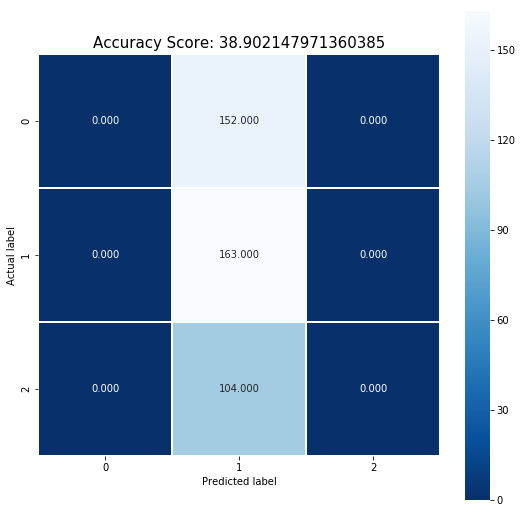

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score*100)
plt.title(all_sample_title, size = 15);